# Project Title
## Y.Aifisha - Marketing

# Project Description

The Y.Afisha analytics department aims to optimize its marketing expenses.

# Objective

Optimize marketing expenses and generate a solution

# Data Description


The visits table (server logs with data about website accesses):

- Uid — unique user identifier
- Device — user device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — ad source identifier through which the user arrived.
All dates in this table are in the format YYYY-MM-DD.


The orders table (data about orders):

- Uid — unique identifier of the user who placed an order
- Buy Ts — order date and time
- Revenue —  Y.Afisha’s revenue from the order


The costs table (data about marketing expenses):

- source_id —  ad source identifier
- dt — date
- costs — expenses for this ad source on this day

# Initialization


In [59]:
# Loading the libraries
import pandas as pd
import numpy as np
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset


In [60]:
# Server logs with data on Y.Afisha accesses from January 2017 to December 2018
# Optimizing data during import
df_logs = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])

In [61]:
# Dump file with all orders placed during the period
# Optimizing data during import
df_orders = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts'])

In [62]:
# Marketing expense statistics
# Optimizing data during import
df_costs = pd.read_csv('costs_us.csv')

# Data preparation


In [63]:
# Correcting df_logs data
df_logs.columns = df_logs.columns.str.lower() # Converting Column Names to Lowercase
df_logs.columns = df_logs.columns.str.replace(" ", "_") # Replacing spaces with '_' (snake_case)

In [64]:
df_logs.duplicated().sum() # Checking for duplicate values

0

In [65]:
df_logs.isna().sum() # Checking for missing values

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [66]:
df_orders.columns = df_orders.columns.str.lower() # Converting Column Names to Lowercase
df_orders.columns = df_orders.columns.str.replace(" ", "_") # Replacing spaces with '_' (snake_case)

In [67]:
df_orders.duplicated().sum() # Checking for duplicate values

0

In [68]:
df_orders.isna().sum() # Checking for missing values

buy_ts     0
revenue    0
uid        0
dtype: int64

In [69]:
df_costs.columns = df_costs.columns.str.lower() # Converting Column Names to Lowercase


In [70]:
df_costs.duplicated().sum() # Checking for duplicate values

0

In [71]:
df_costs.isna().sum() # Checking for missing values

source_id    0
dt           0
costs        0
dtype: int64

In [72]:
# Changing the data type to datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

# Visualizing the corrected data

In [73]:
# Visualizing the data type
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [74]:
df_logs.head() # Visualizing the data

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [75]:
# Visualizing the data type
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [76]:
df_orders.head() # Visualizing the data

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [77]:
# Visualizing the data type
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [78]:
df_costs.head() # Visualizing the data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Note: So far, changes have been made to the data to ensure that the columns have the correct data types for us to proceed with the analysis.

## Creating a report and calculating metrics

# Product


In [79]:
# Quantas pessoas usam-no cada dia, semana e mês?
# Para calcular a atividade semanal e mensal, primeiro criaremos as colunas separadas para os valores de ano, mês e semana.

df_logs['session_year'] = df_logs['start_ts'].dt.year # coluna de Ano
df_logs['session_month'] = df_logs['start_ts'].dt.month # coluna de Mês
df_logs['session_week'] = df_logs['start_ts'].dt.isocalendar().week # coluna de Semana
df_logs['session_date'] = df_logs['start_ts'].dt.date # # coluna da Data
print(df_logs.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


Note: The columns were separated by year, month, and week values.








In [80]:
# How many sessions occur per day? (a user can have multiple sessions).
df_logs['end_ts'] = pd.to_datetime(df_logs['end_ts'])
df_logs['session_year'] = df_logs['start_ts'].dt.year
df_logs['session_month'] = df_logs['start_ts'].dt.month
session_per_user = df_logs.groupby(['session_year', 'session_month']).agg(
    {'uid': ['count', 'nunique']}
)
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['session_per_user'] = (
    session_per_user['n_sessions'] / session_per_user['n_users']
)

session_per_user

n_sessions  n_users  session_per_user
session_year session_month                                       
2017         6                   16505    13259          1.244815
             7                   17828    14183          1.256998
             8                   14355    11631          1.234202
             9                   23907    18975          1.259921
             10                  37903    29692          1.276539
             11                  43969    32797          1.340641
             12                  41983    31557          1.330386
2018         1                   36939    28716          1.286356
             2                   37182    28749          1.293332
             3                   35679    27473          1.298693
             4                   26515    21008          1.262138
             5                   26635    20701          1.286653

Note: By extracting data by year, month, number of sessions, and unique users, we identified the months with the highest retention rates. In 2017, these were October (10) and November (11), while in 2018, they were January (1), February (2), and May (5), where we observed a high number of users and sessions.

In [81]:
# What is the length of each session?
df_logs['session_duration_sec'] = (df_logs['end_ts'] - df_logs['start_ts']).dt.seconds
df_logs['session_duration_sec'].mode()

0    60
Name: session_duration_sec, dtype: int32

<Axes: >

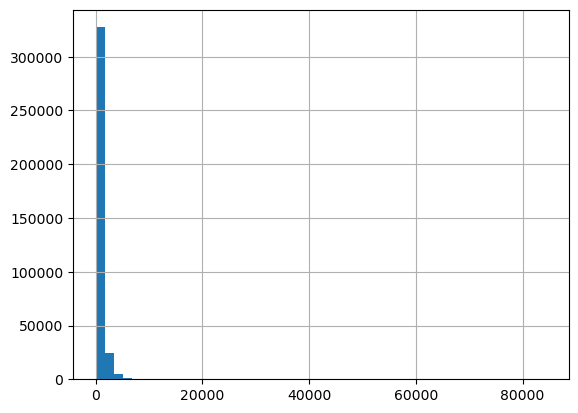

In [82]:
# Observing the distribution
df_logs['session_duration_sec'].hist(bins=50)

Note: Using the mode, we can identify that most customers spend around 60 seconds on the app, but there are variations among users who stay longer than 60 seconds and those who stay shorter.

Note: Using the average, each session lasts approximately 621 seconds, which is 10 minutes and 21 seconds per session (not feasible).

Note: Using the median, each session lasts around 300 seconds, which is 5 minutes per session (not feasible).

In [83]:
# Calculating metrics to determine user frequency
mau_total = df_logs.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
wau_total = df_logs.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
dau_total = df_logs.groupby('session_date').agg({'uid': 'nunique'}).mean()
#print(int(mau_total))
#print(int(wau_total))
#print(int(dau_total))

# How often do users return?
# To determine how often users return to the app, we calculate the retention rate.
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Note: We obtained the frequency of users on a weekly and monthly basis. Weekly, we have a retention rate of 15.8%, and monthly, we have a retention rate of 3.9%.

Note: The platform is managing to attract users back on a weekly basis at a moderate rate, but it is facing significant challenges in retaining these users over the course of a month. To improve retention, we can review and enhance the content, usability, and incentives offered to users. 

#  Sales

When do people start buying? (In KPI analysis, we are generally interested in knowing the time period between registration and conversion—when the user becomes a customer. For example, if a user registers and makes their first purchase on the same day, it can be categorized as Conversion 0d. If the purchase is made the following day, it will be Conversion 1d. You can use any approach that allows you to compare conversions across different cohorts, so you can determine which cohort or marketing channel has the highest efficiency.)

In [84]:
# Obtaining data on the registration start date and the date of the first purchase.
df_t_min = df_logs.groupby(['uid'])['start_ts'].min()
dfo_t_min = df_orders.groupby(['uid'])['buy_ts'].min()
df_merged = pd.merge(df_t_min, dfo_t_min, on='uid')
df_merged

,start_ts,buy_ts
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00


In [85]:
# Obtaining data on the number of days users took to make their first purchase.
df_merged['days_until_first_buy'] = ((df_merged['buy_ts'] - df_merged['start_ts']) / np.timedelta64(1,'D')).astype('int')
df_merged['days_until_first_buy']

uid
313578113262317         106
1575281904278712          0
2429014661409475          0
2464366381792757          0
2551852515556206          0
                       ... 
18445147675727495770     95
18445407535914413204      0
18445601152732270159    231
18446156210226471712    103
18446167067214817906      0
Name: days_until_first_buy, Length: 36523, dtype: int32

In [86]:
# Getting an idea of the distribution of the data fields.
print(df_merged['days_until_first_buy'].describe())

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_until_first_buy, dtype: float64


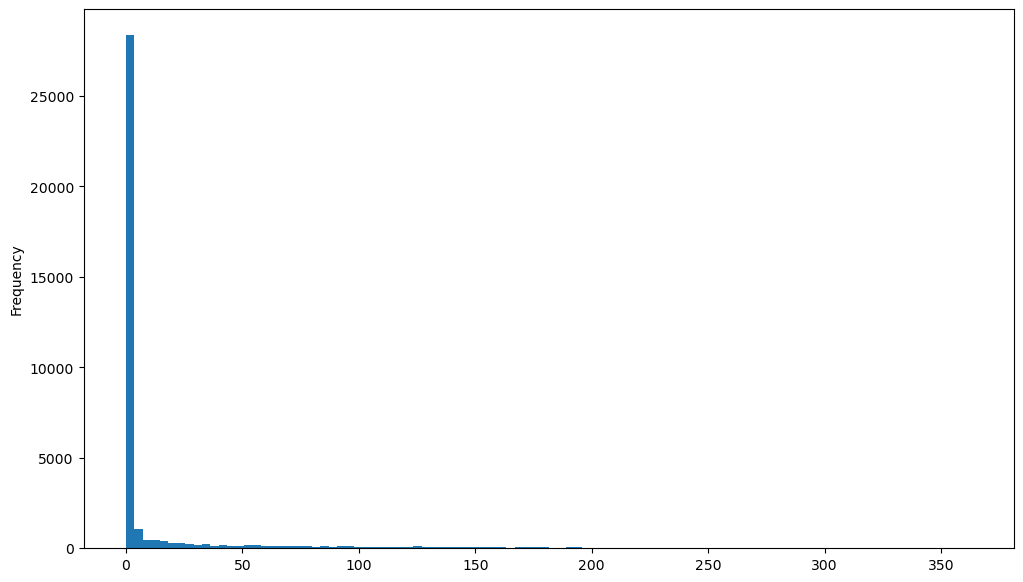

In [102]:
# Plotting a graph for better analysis
df_merged['days_until_first_buy'].plot(kind='hist', bins=100, figsize=(12,7));

Obs: A maioria das compras estão acontecendo logo após o cadastro dos nosso usuários ou seja a primeira compra de um usuário ocorrem com mais frequencia no dia do cadastro.

In [103]:
# How many orders do customers make during a certain period of time?

# Creating cohorts
df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M')
df_orders['cohort'] = df_orders.groupby('uid')['order_month'].transform('min')

# defining periods for analysis.
df_cohort = df_orders.groupby(['cohort', 'order_month']).agg(revenue=('revenue', 'sum'), n_orders=('uid', 'count'), n_users=('uid', 'nunique')).reset_index()
df_cohort['ticket_medio'] = df_cohort['revenue'] / df_cohort['n_users']
df_cohort['qtd_compras_media'] = df_cohort['n_orders'] / df_cohort['n_users']

df_cohort['period_number'] = (df_cohort['order_month'] - df_cohort['cohort']).apply(attrgetter('n'))

cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='ticket_medio')
display(cohort_pivot.round(2))

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,4.72,16.10,17.71,35.76,23.51,22.21,31.01,25.03,19.30,27.23,25.68,9.8
2017-07,6.01,12.40,21.04,10.79,6.94,7.90,6.42,6.99,7.38,12.86,11.51,NaN
2017-08,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,NaN,NaN
2017-09,5.64,22.19,13.45,138.67,19.88,26.10,27.44,16.96,11.04,NaN,NaN,NaN
2017-10,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,NaN,NaN,NaN,NaN
2017-11,5.15,7.34,6.79,12.51,7.46,4.58,7.56,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,7.82,39.37,48.14,27.43,23.52,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,8.72,12.37,11.20,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,8.61,4.94,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


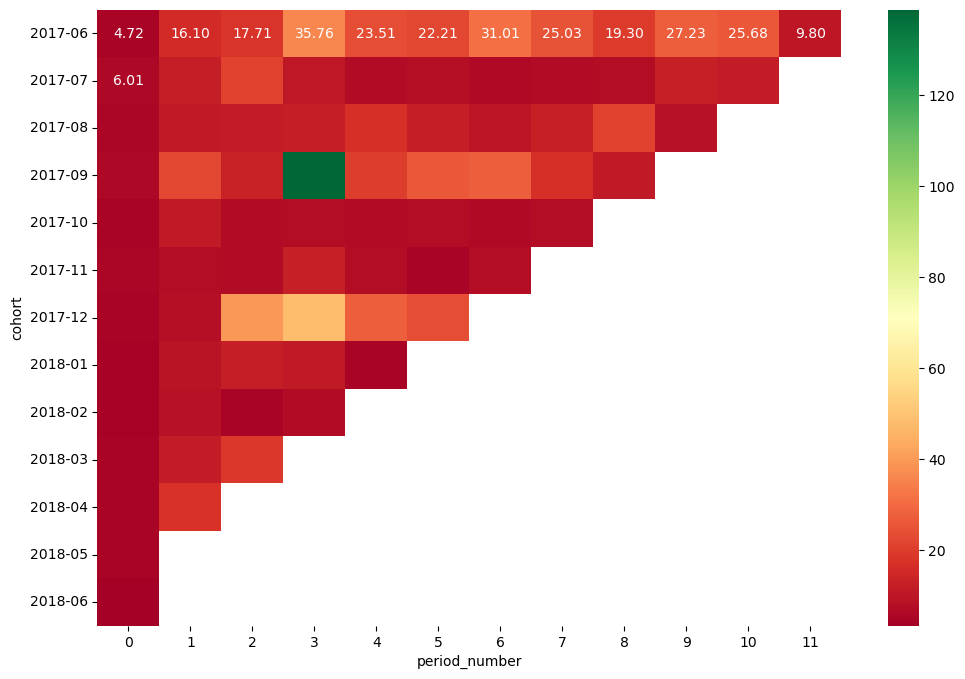

In [104]:
# Displaying in the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_pivot, annot=True, mask=cohort_pivot.isnull(), fmt='.2f', cmap='RdYlGn');

Note: The data shows us that customers tend to place orders more frequently in the first months after their initial order, with a decrease in the number of orders over time.

Note: We need strategies to maintain customer engagement and encourage repeat purchases.

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,1.16,2.90,3.48,4.19,3.32,3.25,4.45,3.70,3.66,3.40,2.13,1.62
2017-07,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,NaN
2017-08,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,NaN,NaN
2017-09,1.14,1.68,1.61,2.22,1.29,1.70,1.64,1.51,1.42,NaN,NaN,NaN
2017-10,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,NaN,NaN,NaN,NaN
2017-11,1.18,1.79,1.52,1.99,1.68,1.23,1.65,NaN,NaN,NaN,NaN,NaN
2017-12,1.15,1.85,1.96,1.85,1.72,1.67,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.12,1.96,1.92,1.49,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.12,1.88,1.43,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


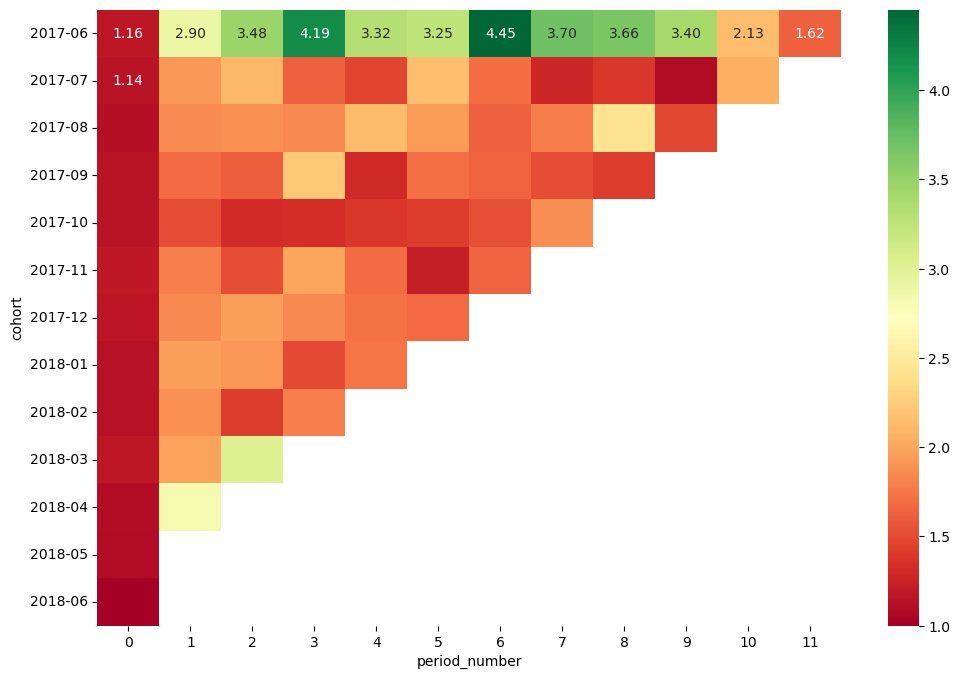

In [105]:
# What is the average purchase volume??

# Displaying the average purchase volume
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='qtd_compras_media')
display(cohort_pivot.round(2))
# Displaying in the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_pivot, annot=True, mask=cohort_pivot.isnull(), fmt='.2f', cmap='RdYlGn');    

Note: We obtained an average of 1.82 purchases per user.

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,4.72,16.10,17.71,35.76,23.51,22.21,31.01,25.03,19.30,27.23,25.68,9.8
2017-07,6.01,12.40,21.04,10.79,6.94,7.90,6.42,6.99,7.38,12.86,11.51,NaN
2017-08,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,NaN,NaN
2017-09,5.64,22.19,13.45,138.67,19.88,26.10,27.44,16.96,11.04,NaN,NaN,NaN
2017-10,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,NaN,NaN,NaN,NaN
2017-11,5.15,7.34,6.79,12.51,7.46,4.58,7.56,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,7.82,39.37,48.14,27.43,23.52,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,8.72,12.37,11.20,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,8.61,4.94,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


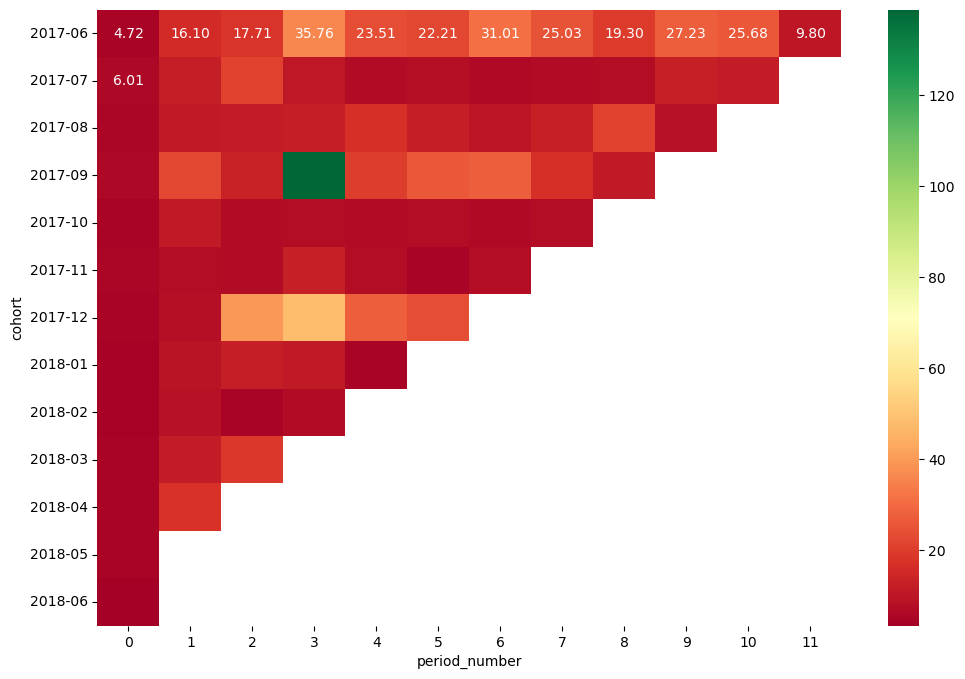

In [106]:
# How much money do they bring to the company (LTV)?
# df_cohort(['LTV'] lifetime value) = (revenue - costs)

df_cohort['period_number'] = (df_cohort['order_month'] - df_cohort['cohort']).apply(attrgetter('n'))

cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='ticket_medio')
display(cohort_pivot.round(2))

plt.figure(figsize=(12,8))
sns.heatmap(cohort_pivot, annot=True, mask=cohort_pivot.isnull(), fmt='.2f', cmap='RdYlGn');


Note: The June 2017 cohort brought a total of 258.06 monetary units to the company over time (periods).

Note: The September 2017 cohort was the most profitable, with an LTV of 281.37 monetary units.

Note: The most recent cohorts (2018) have lower values, but this is due to the shorter observation period.







## Marketing

In [ ]:
# How much money was spent? In total/by source/over time

# Calculating the total spent
df_total_costs = df_costs['costs'].sum()

# Calculating the spending by source
costs_for_origins = df_costs.groupby('source_id')['costs'].sum()

# Calculating the spending over time (by month)
df_costs['month'] = df_costs['dt'].dt.to_period('M')
costs_for_month = df_costs.groupby('month')['costs'].sum()

In [ ]:
# Total spent
df_total_costs

329131.62

In [ ]:
# Spending by source
costs_for_origins

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [ ]:
# Spending over time (by month)
costs_for_month

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

In [107]:
# How much did it cost to acquire customers for each source?

# Calculating the number of customers acquired from each source
clients_per_origins = df_logs['source_id'].value_counts()

# Calculating the customer acquisition cost for each source
cost_client_per_origins = costs_for_origins / clients_per_origins
cost_client_per_origins

source_id
1     0.610570
2     0.898796
3     1.650761
4     0.599972
5     0.773591
6          NaN
7          NaN
9     0.415568
10    0.580797
dtype: float64

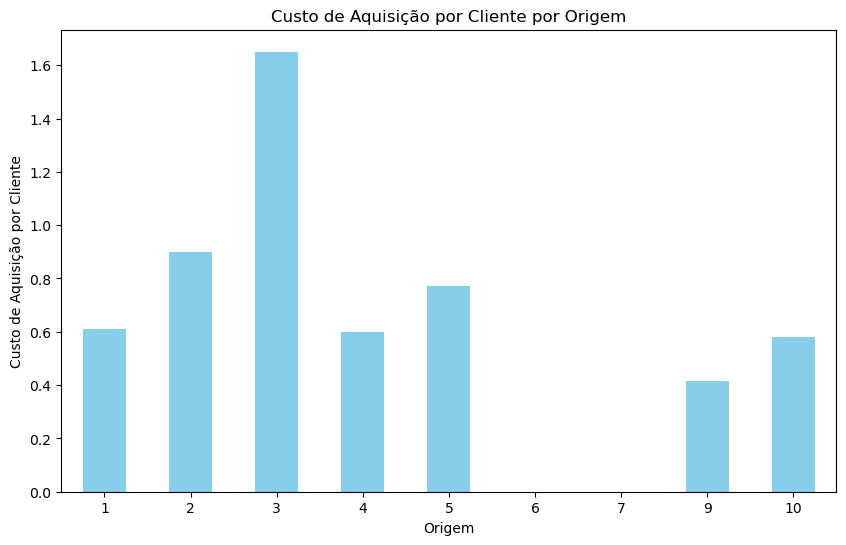

In [ ]:
# Plotting a graph
plt.figure(figsize=(10, 6))
cost_client_per_origins.plot(kind='bar', color='skyblue')
plt.title('Custo de Aquisição por Cliente por Origem')
plt.xlabel('Origem')
plt.ylabel('Custo de Aquisição por Cliente')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Was the investment worth it? (ROI)

# Calculating the total revenue generated by customers
total_revenue = df_orders['revenue'].sum()
total_revenue

252057.19999999998

In [ ]:
# Calculating the ROI
roi = ((total_revenue - df_total_costs) / df_total_costs) * 100
roi

-23.41750695360112

Note: We obtained a negative value of 23.4%, which means that the investments resulted in losses.

# Step 3. Write a conclusion: recommend to marketing specialists how much money and where it would be better to invest.

## Recommendation to marketing specialists (conclusion)
* Implementing strategies to increase the LTV of acquired customers can help improve overall profitability.
* I urgently recommend that marketing specialists adjust the strategy, focusing on more efficient sources and implementing continuous monitoring to ensure that investments result in a positive ROI.

# Discovering the number of users on each platform (conclusion)

## Which sources/platforms would you recommend?

In [100]:
df_platforms_t = df_logs['device'].value_counts().get('touch', 0)
df_platforms_t

96833

In [101]:
df_platforms = df_logs['device'].value_counts().get('desktop', 0)
df_platforms

262567

Note: We have more desktop users than mobile users, so our focus will be on desktop platforms.

Note: With the difference in customers on desktop, our marketing retention investment focus should be on the platform where we have more customers, but we need to find a way to keep those customers active.

# Justify your choice: what metrics did you focus on? Why? What conclusions did you draw from finding the metric values?

Notes: 
- I used the metric (LTV) by cohort.

- Why LTV (lifetime value)? It evaluates the total revenue generated by customers over time; a higher LTV indicates more valuable customers. When calculating LTV, we consider the gross profit of a consumer per period.

- The analysis of LTV (lifetime value) for each cohort over the periods shows that the June 2017 cohort generated an LTV of 258.06 monetary units, while the other cohorts showed significant variations in LTV over time.

# Conclusion
Knowing that the ROI was negative with a rate of -23%, this helped us identify that the marketing investments did not generate enough return to cover the costs. Given this, it is essential to review and adjust the marketing strategy to improve efficiency and profitability.